In [1]:
import os

import matplotlib.pyplot as plt
import PIL.Image as PilImage
import textwrap, os


things to check:

1. torso / body alignment
2. bob sequence

In [2]:
CLOUD_PATH = "/Users/rfoltz/Library/Mobile Documents/com~apple~CloudDocs/DJ2020 art assets /Spritesheets/64x64"

SHEET_DIR = "generic"

In [21]:
def parse_sprites(path, sprite_size):
    sprites = []
    im = PilImage.open(path)
    imgwidth, imgheight = im.size
    for i in range(0, imgheight, sprite_size):
        for j in range(0, imgwidth, sprite_size):
            box = (j, i, j+sprite_size, i+sprite_size)
            sprite = im.crop(box)
            sprites.append(sprite)
    return sprites

def combine(sprite1, sprite2):
    x = sprite1.copy()
    y = sprite2.copy()
    x.paste(y, (0, 0), y)
    return x

def display_images(images: [PilImage], columns=5, width=20, 
                   height=8, max_images=100, label_wrap_length=50, 
                   label_font_size=8):

    if not images:
        print("No images to display.")
        return 

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images]

    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))
    for i, image in enumerate(images):
        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.imshow(image)
        plt.title(i, fontsize=label_font_size)

In [41]:
def gunwalk(sprites):
    walk_down = [combine(leg_sprites[i], sprites[0]) for i in [5, 6, 7, 8]]
    walk_downright = [combine(leg_sprites[i], sprites[5]) for i in [9, 10, 11, 12]]
    walk_right = [combine(leg_sprites[i], sprites[10]) for i in [13, 14, 15, 16]]
    walk_rightup = [combine(leg_sprites[i], sprites[14]) for i in [17, 18, 19, 20]]
    walk_up = [combine(leg_sprites[i], sprites[18]) for i in [21, 22, 23, 24]]
    display_images(walk_down)
    display_images(walk_downright)
    display_images(walk_right)
    display_images(walk_rightup)
    display_images(walk_up)

In [5]:
path = os.path.join(CLOUD_PATH, SHEET_DIR)

torso_path = os.path.join(path, 'Torso.png')
legs_path = os.path.join(path, 'Legs.png')
pistol_path = os.path.join(path, 'pistol.png')
smg_path = os.path.join(path, 'smg.png')
rifle_path = os.path.join(path, 'rifle.png')
shotgun_path = os.path.join(path, 'shotgun.png')

leg_sprites = parse_sprites(legs_path, 64)
torso_sprites = parse_sprites(torso_path, 64)
pistol_sprites = parse_sprites(pistol_path, 64)
smg_sprites = parse_sprites(smg_path, 64)
rifle_sprites = parse_sprites(rifle_path, 64)
shotgun_sprites = parse_sprites(shotgun_path, 64)

In [19]:
combined_sprites = []
for i in range(len(leg_sprites)):
    sprite = combine(leg_sprites[i], torso_sprites[i])
    combined_sprites.append(sprite)

# unarmed

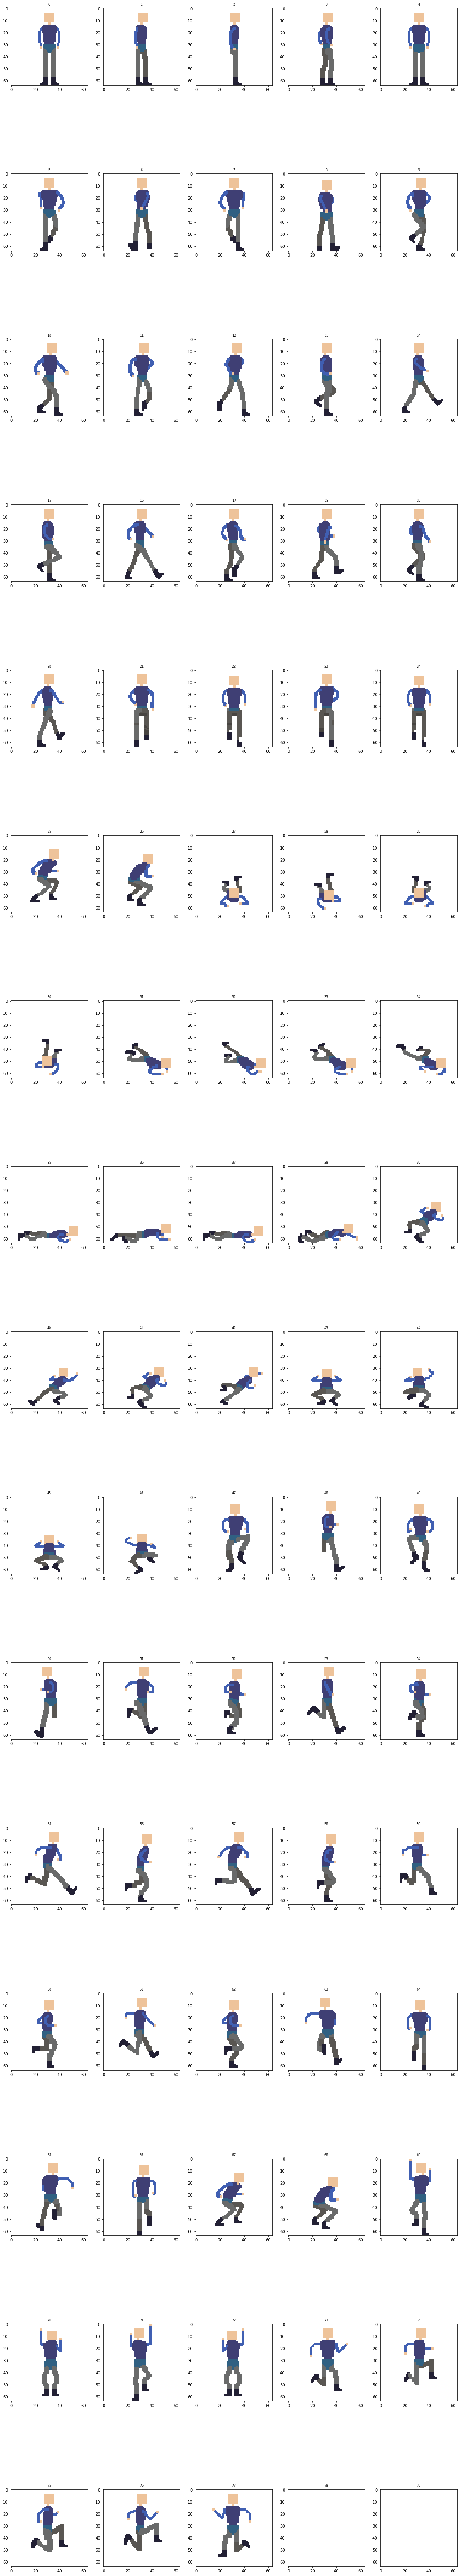

In [43]:
display_images(combined_sprites)

# pistol

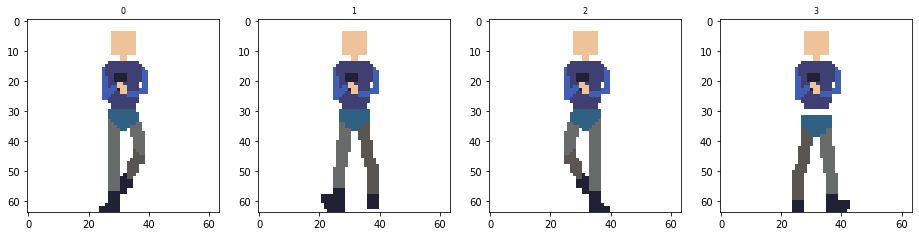

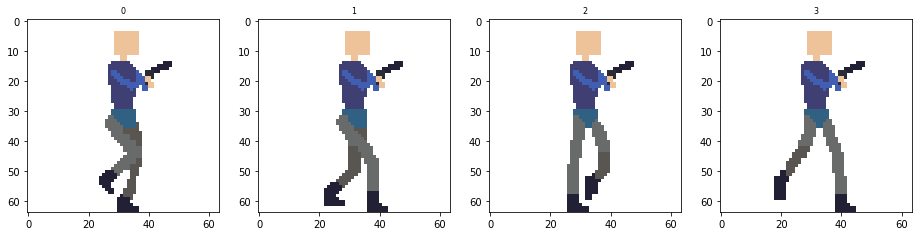

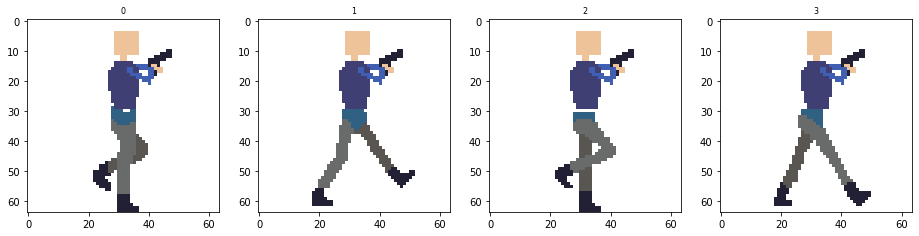

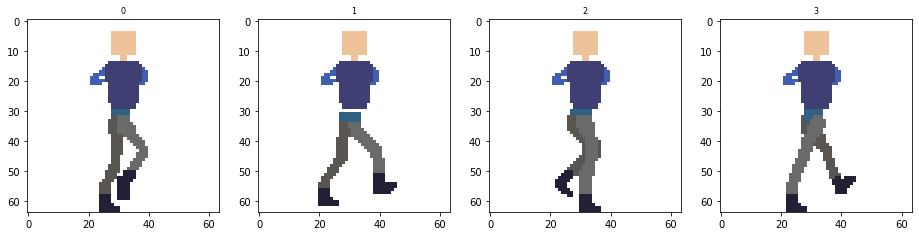

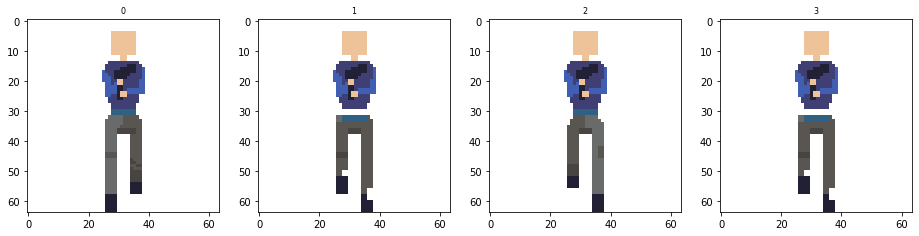

In [44]:
gunwalk(pistol_sprites)

# smg

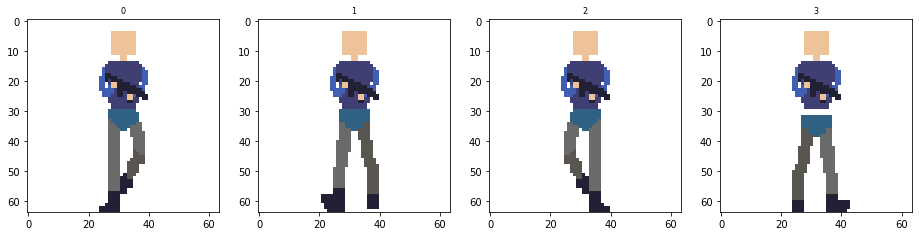

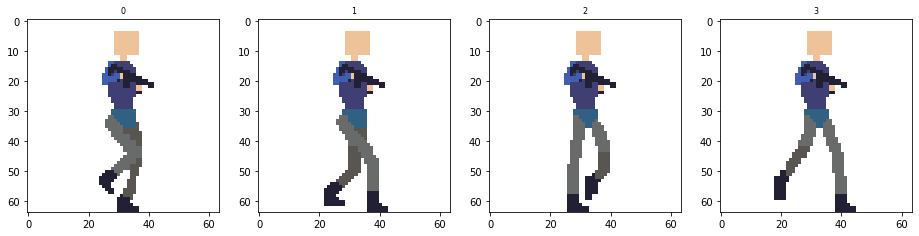

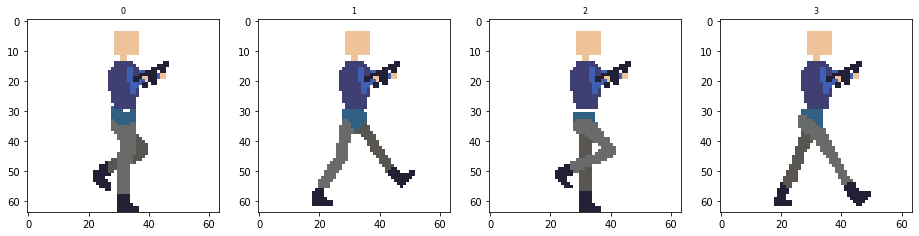

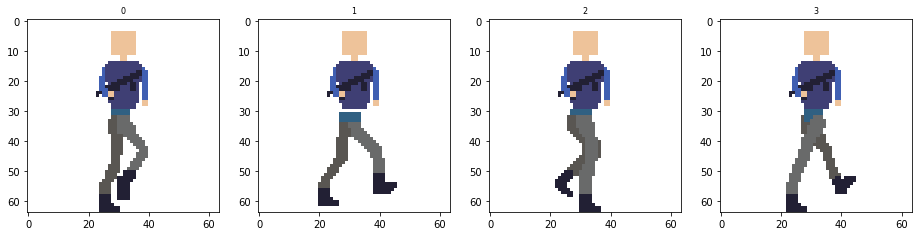

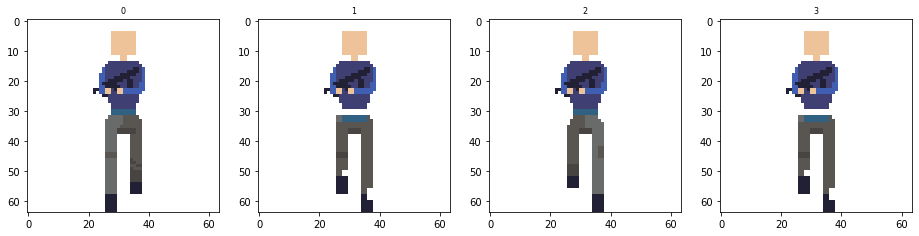

In [45]:
gunwalk(smg_sprites)

# rifle

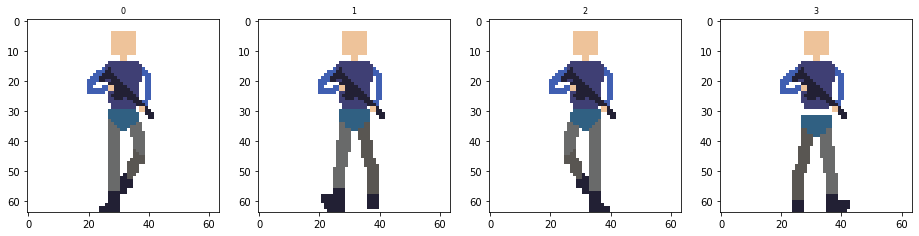

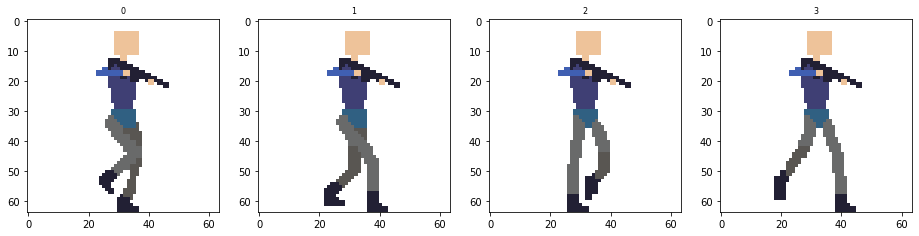

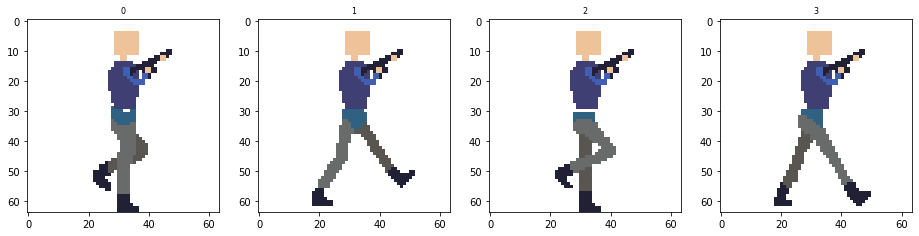

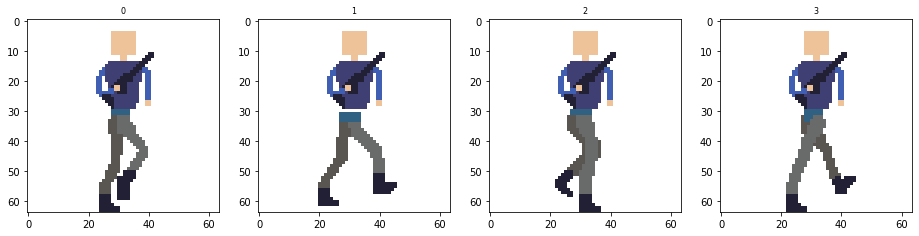

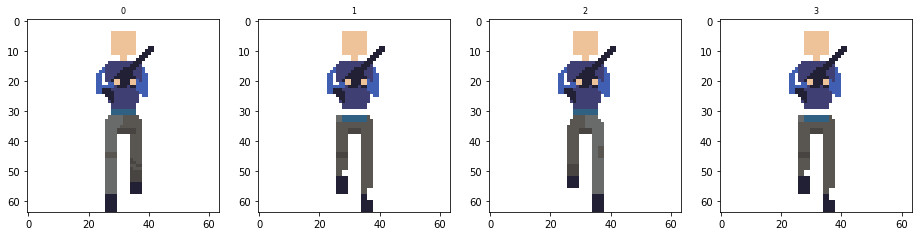

In [46]:
gunwalk(rifle_sprites)

# shotgun

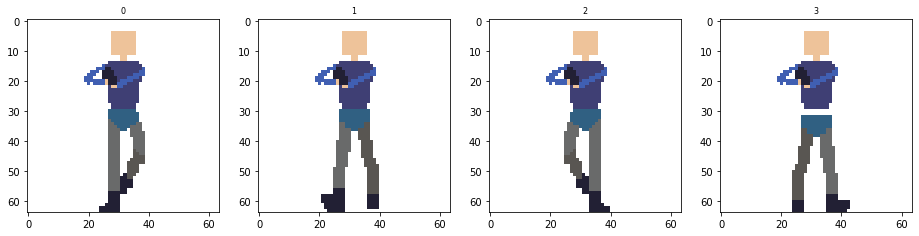

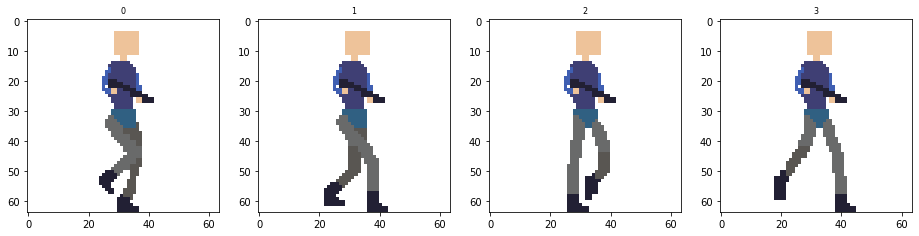

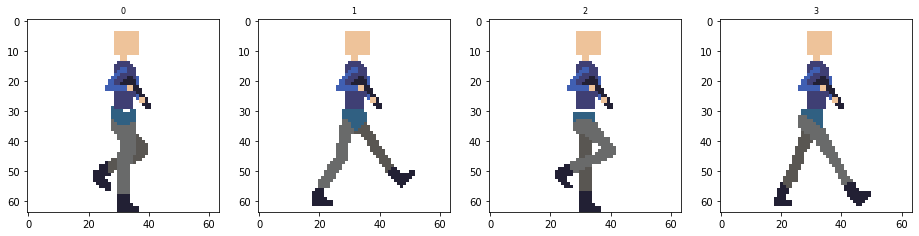

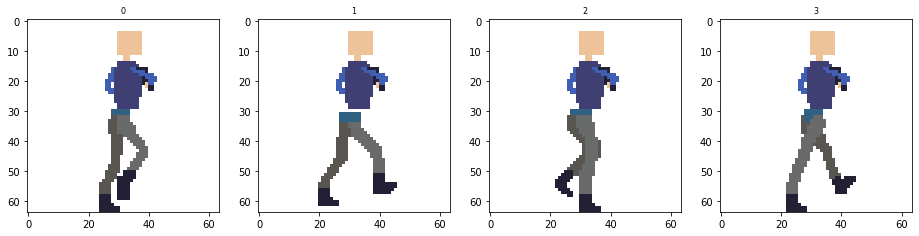

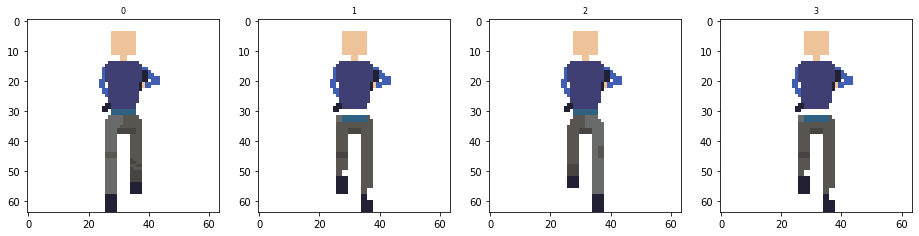

In [42]:
gunwalk(shotgun_sprites)